<a href="https://colab.research.google.com/github/CrampsP/CrampsP.github.io/blob/main/notebooks/starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
campaign

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37064,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
37065,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
37066,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
37067,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [72]:
filtered_df = campaign[~campaign.apply(lambda row: row.astype(str).str.contains('unknown|999').any(), axis=1)]
filtered_df = filtered_df.dropna()
filtered_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21712,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,1,6,1,success,-0.1,93.200,-42.0,4.286,5195.8,no
21851,48,management,married,university.degree,no,yes,no,cellular,nov,mon,1,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
22047,36,self-employed,single,university.degree,no,yes,no,cellular,nov,mon,2,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
22163,32,blue-collar,married,basic.9y,no,no,no,cellular,nov,mon,2,5,1,success,-0.1,93.200,-42.0,4.191,5195.8,yes
22328,31,entrepreneur,divorced,basic.4y,no,no,no,cellular,nov,tue,1,5,1,success,-0.1,93.200,-42.0,4.153,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37045,60,blue-collar,married,basic.4y,no,yes,no,cellular,nov,tue,2,4,1,success,-1.1,94.767,-50.8,1.035,4963.6,no
37046,35,technician,divorced,basic.4y,no,yes,no,cellular,nov,tue,3,4,2,success,-1.1,94.767,-50.8,1.035,4963.6,yes
37047,54,admin.,married,professional.course,no,no,no,cellular,nov,tue,2,10,1,success,-1.1,94.767,-50.8,1.035,4963.6,yes
37057,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes


In [73]:
filtered_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [100]:
X = pd.get_dummies(filtered_df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed']], drop_first=True)
y = pd.get_dummies(filtered_df['y'], drop_first=True)

In [101]:
# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Build the decision tree
clf = DecisionTreeClassifier()

# Train it
clf.fit(X_train, y_train)

# Test it
clf.score(X_test, y_test)

0.6033519553072626

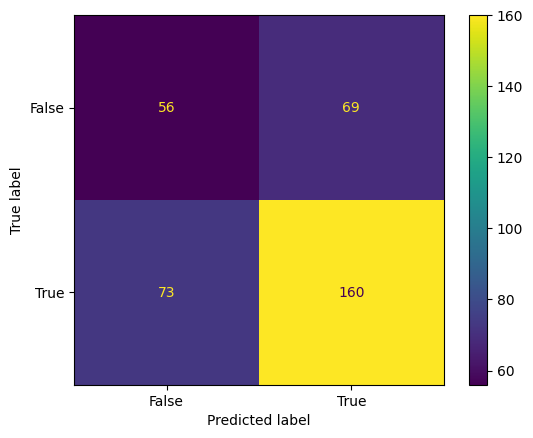

In [102]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, clf.predict(X_test))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

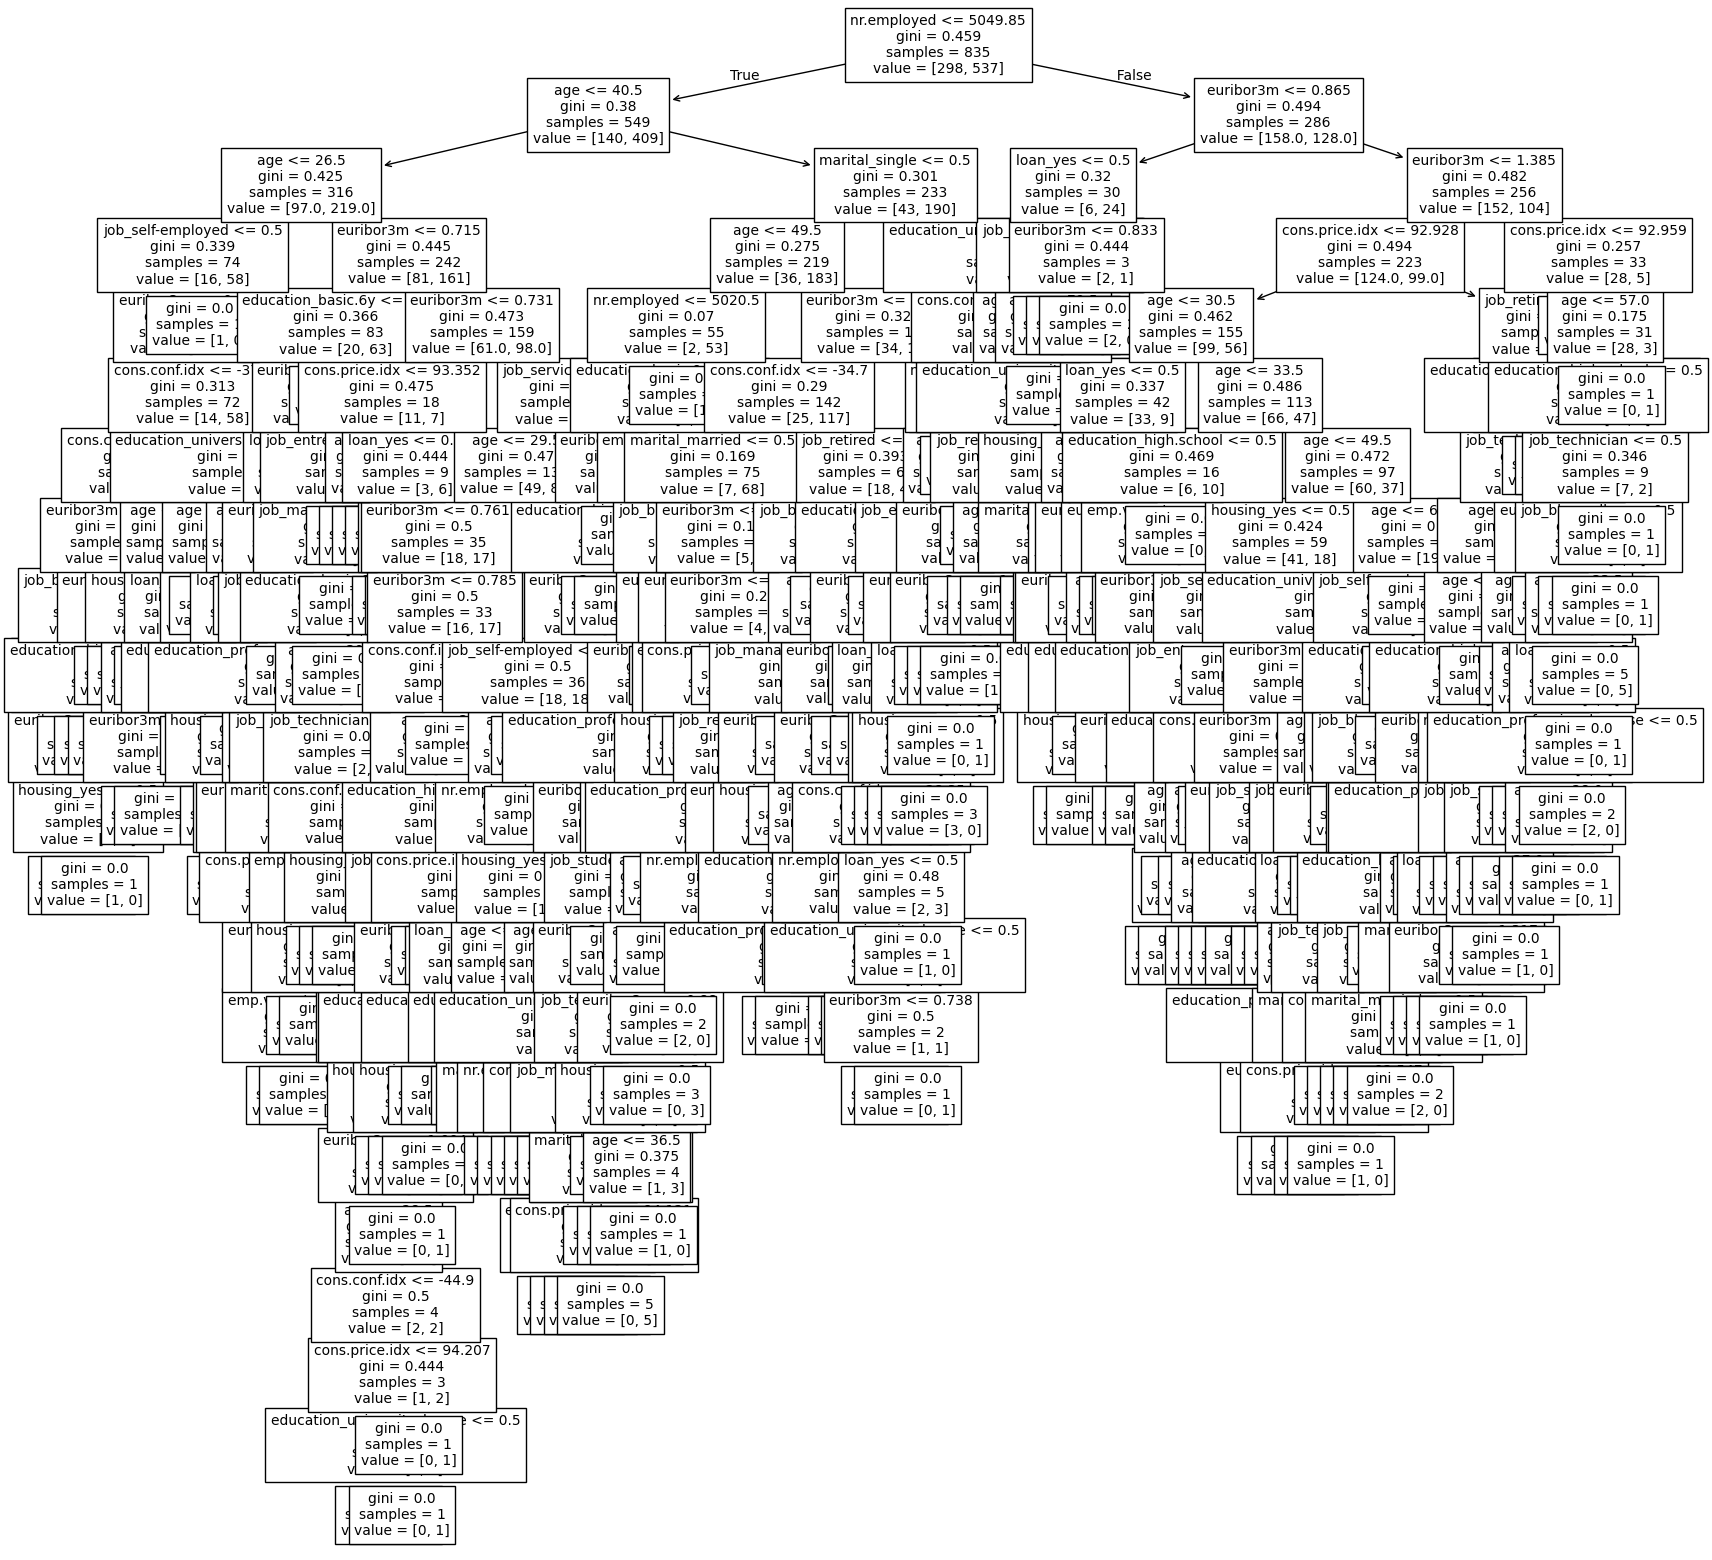

In [103]:
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, fontsize=10, feature_names=X.columns)
plt.show()